<a href="https://colab.research.google.com/github/MinhQuang31751/Python/blob/main/69_HoangMinhQuang.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **1.BỘ DỮ LIỆU LINKS**

## 1.1.Data cleaing

###**1.1.1 Chuẩn bị và Kiểm tra an toàn**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/PTDL_PY/Bản sao của links.csv')
display(df)

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
...,...,...,...
87580,292731,26812510,1032473.0
87581,292737,14907358,986674.0
87582,292753,12388280,948139.0
87583,292755,64027,182776.0


###**1.1.2. Xử lý Giá trị Bị thiếu (Missing Values)**

In [ ]:
print(df.isnull().sum())


movieId      0
imdbId       0
tmdbId     124
dtype: int64


**Đánh giá**

- cột tmdbId có 124 giá trị bị null

###**1.1.3. Loại bỏ các giá trị bị thiếu**

In [ ]:
df.dropna(subset=['tmdbId'], inplace=True)

###**1.1.4. Kiểm tra lại Dữ liệu sau khi Làm sạch**

In [ ]:
print(df.isnull().sum())

movieId    0
imdbId     0
tmdbId     0
dtype: int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87461 entries, 0 to 87584
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  87461 non-null  int64  
 1   imdbId   87461 non-null  int64  
 2   tmdbId   87461 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 2.7 MB


##**1.2.EDA Và Trực Quan Hóa Dữ Liệu**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Thiết lập style cho biểu đồ
plt.style.use('default')
sns.set_palette("husl")

###**1.2.1.Phân tích dữ liệu của các cột**

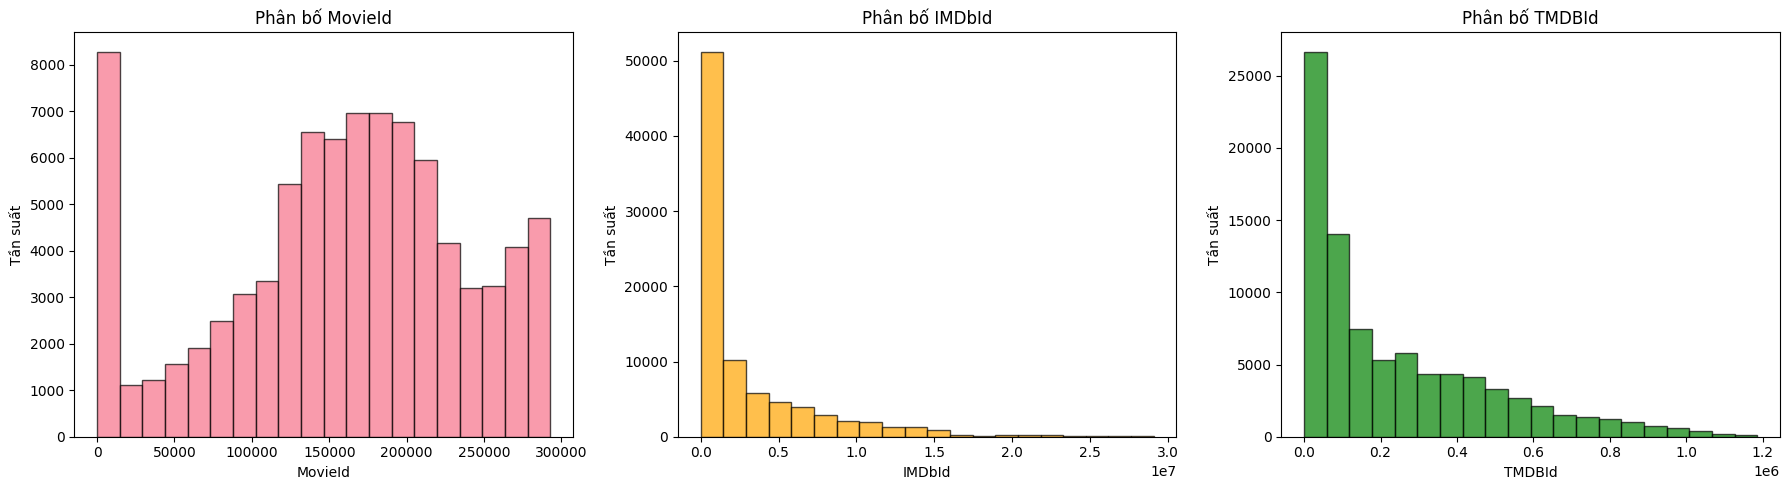

In [ ]:
# 1. Biểu đồ phân bố của các cột
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Phân bố movieId
axes[0].hist(df['movieId'], bins=20, alpha=0.7, edgecolor='black')
axes[0].set_title('Phân bố MovieId')
axes[0].set_xlabel('MovieId')
axes[0].set_ylabel('Tần suất')

# Phân bố imdbId
axes[1].hist(df['imdbId'], bins=20, alpha=0.7, edgecolor='black', color='orange')
axes[1].set_title('Phân bố IMDbId')
axes[1].set_xlabel('IMDbId')
axes[1].set_ylabel('Tần suất')

# Phân bố tmdbId
axes[2].hist(df['tmdbId'], bins=20, alpha=0.7, edgecolor='black', color='green')
axes[2].set_title('Phân bố TMDBId')
axes[2].set_xlabel('TMDBId')
axes[2].set_ylabel('Tần suất')

plt.tight_layout()
plt.show()

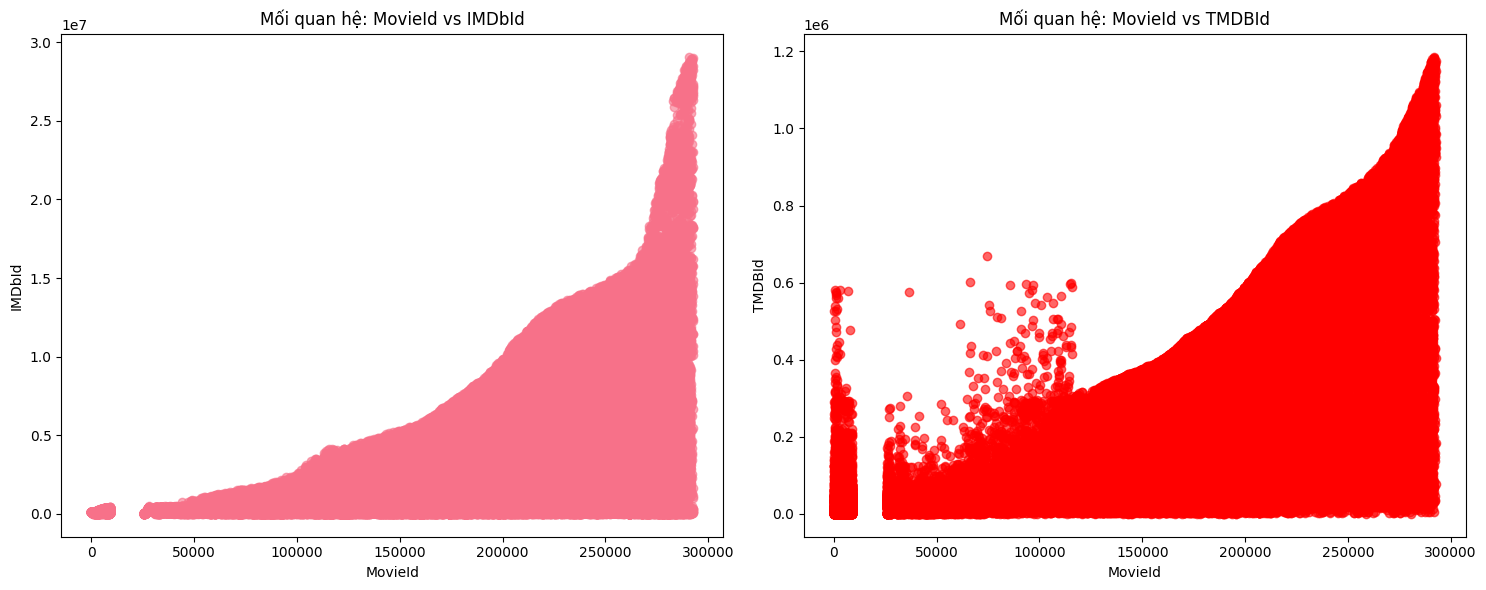

In [ ]:
# 2. Biểu đồ scatter plot để xem mối quan hệ giữa các ID
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Scatter plot: movieId vs imdbId
axes[0].scatter(df['movieId'], df['imdbId'], alpha=0.6)
axes[0].set_title('Mối quan hệ: MovieId vs IMDbId')
axes[0].set_xlabel('MovieId')
axes[0].set_ylabel('IMDbId')

# Scatter plot: movieId vs tmdbId
axes[1].scatter(df['movieId'], df['tmdbId'], alpha=0.6, color='red')
axes[1].set_title('Mối quan hệ: MovieId vs TMDBId')
axes[1].set_xlabel('MovieId')
axes[1].set_ylabel('TMDBId')

plt.tight_layout()
plt.show()

###**1.2.2.Biểu đồ box plot để xem phân phối và outliers**

/tmp/ipython-input-2973736002.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([boxplot_data['imdbId'], boxplot_data['tmdbId']],


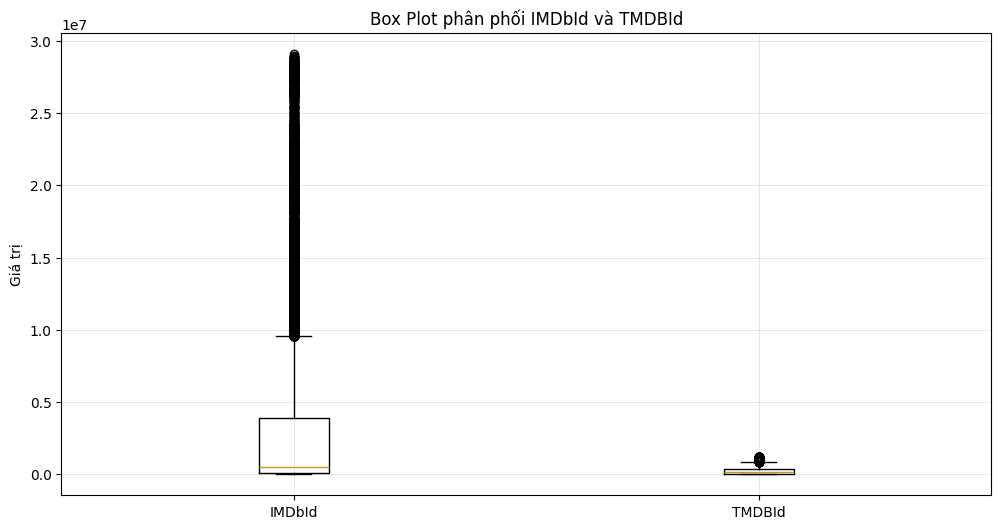

In [ ]:
# 3. Biểu đồ box plot để xem phân phối và outliers
plt.figure(figsize=(12, 6))
boxplot_data = df[['imdbId', 'tmdbId']]
plt.boxplot([boxplot_data['imdbId'], boxplot_data['tmdbId']],
            labels=['IMDbId', 'TMDBId'])
plt.title('Box Plot phân phối IMDbId và TMDBId')
plt.ylabel('Giá trị')
plt.grid(True, alpha=0.3)
plt.show()

###**1.2.3.Biểu đồ density plot**

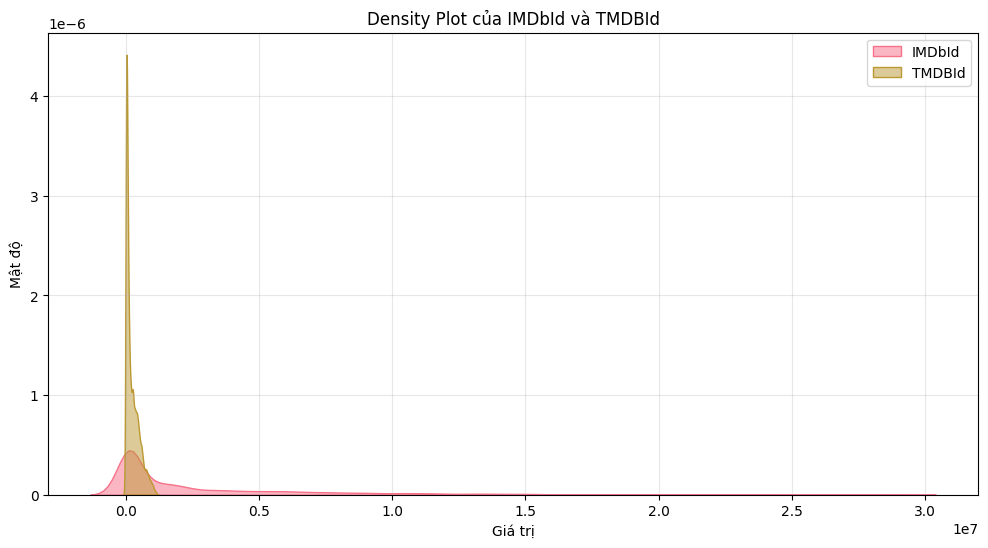

In [ ]:
# 6. Biểu đồ density plot
plt.figure(figsize=(12, 6))
sns.kdeplot(df['imdbId'], label='IMDbId', fill=True, alpha=0.5)
sns.kdeplot(df['tmdbId'], label='TMDBId', fill=True, alpha=0.5)
plt.title('Density Plot của IMDbId và TMDBId')
plt.xlabel('Giá trị')
plt.ylabel('Mật độ')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

1.2.4.Biểu đồ HEATMAP

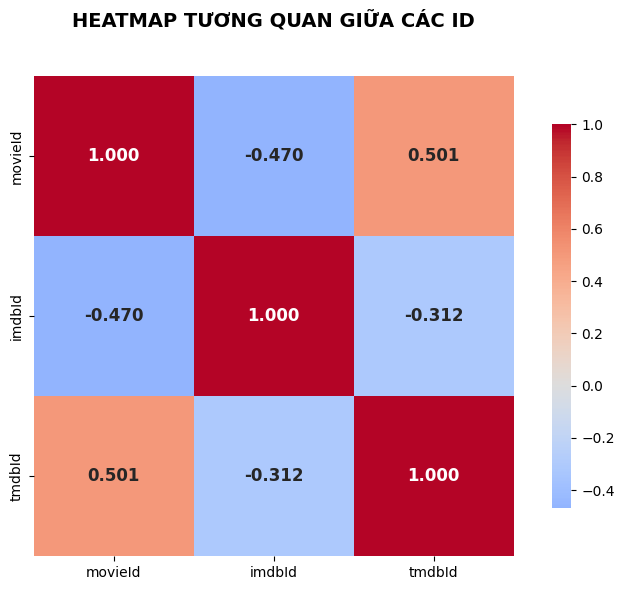

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd


# 1. HEATMAP TƯƠNG QUAN
plt.figure(figsize=(8, 6))
correlation_matrix = df.corr()

sns.heatmap(correlation_matrix,
            annot=True,
            cmap='coolwarm',
            center=0,
            square=True,
            fmt='.3f',
            cbar_kws={'shrink': 0.8},
            annot_kws={'size': 12, 'weight': 'bold'})

plt.title('HEATMAP TƯƠNG QUAN GIỮA CÁC ID\n', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()


###**1.2.5.Biểu đồ phân tán**

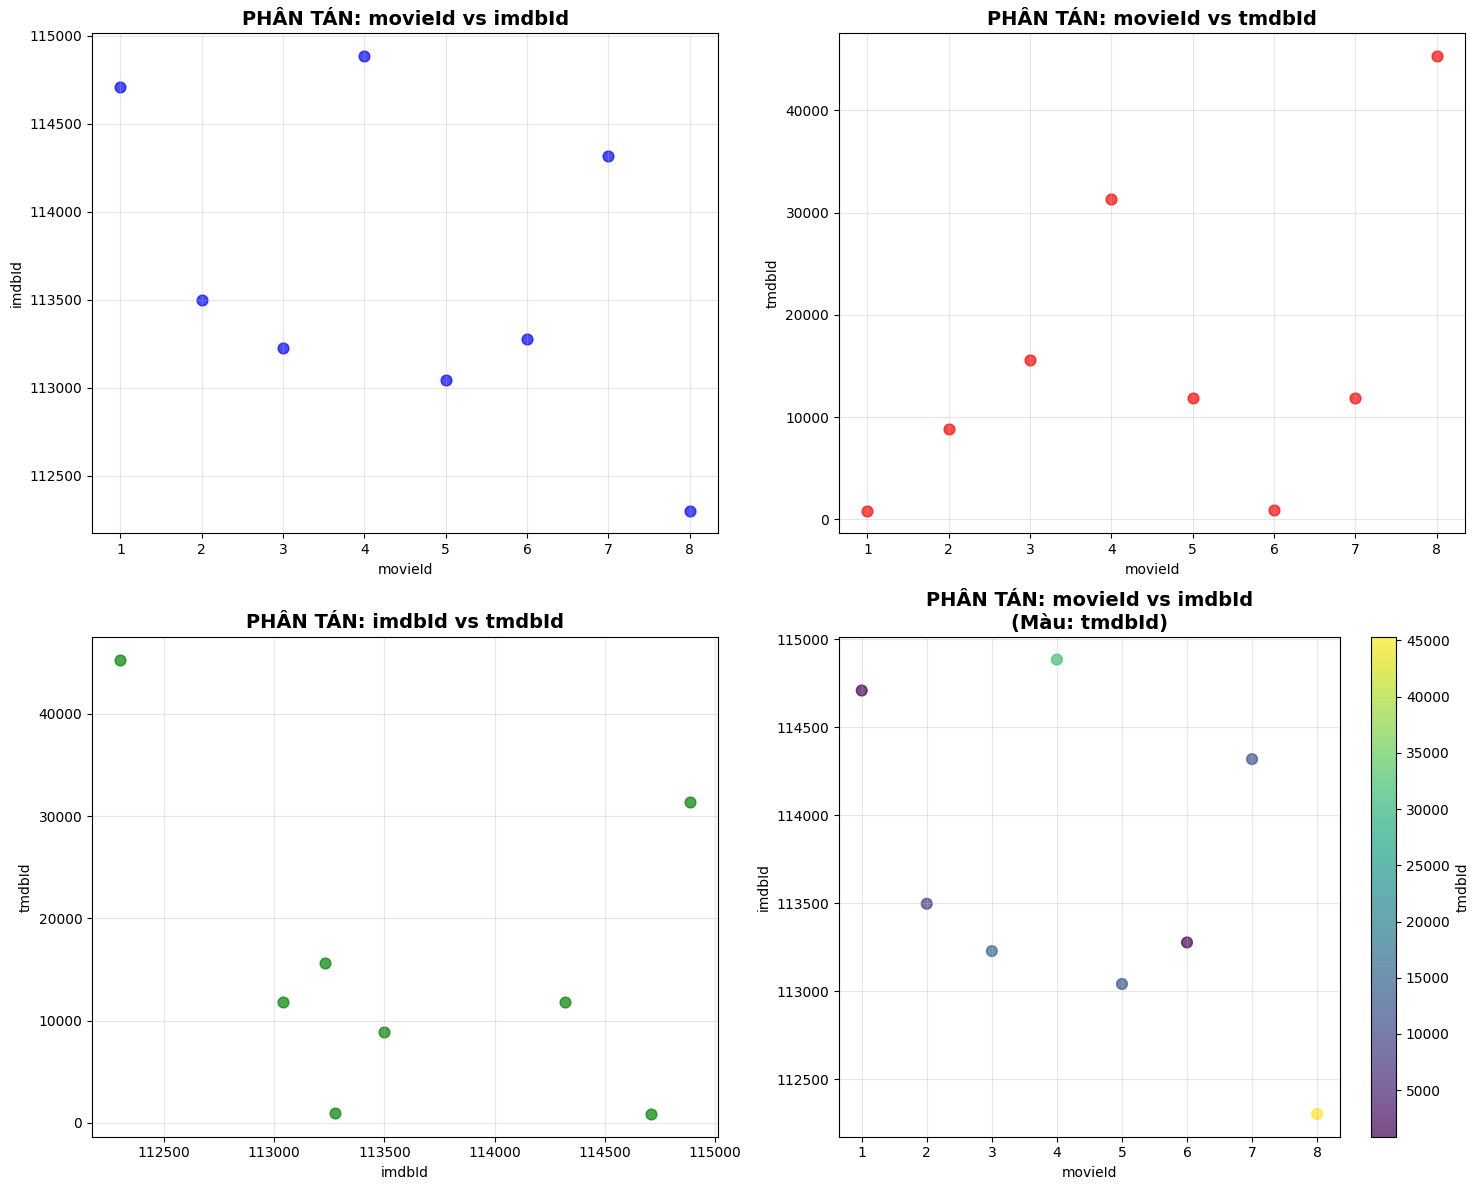

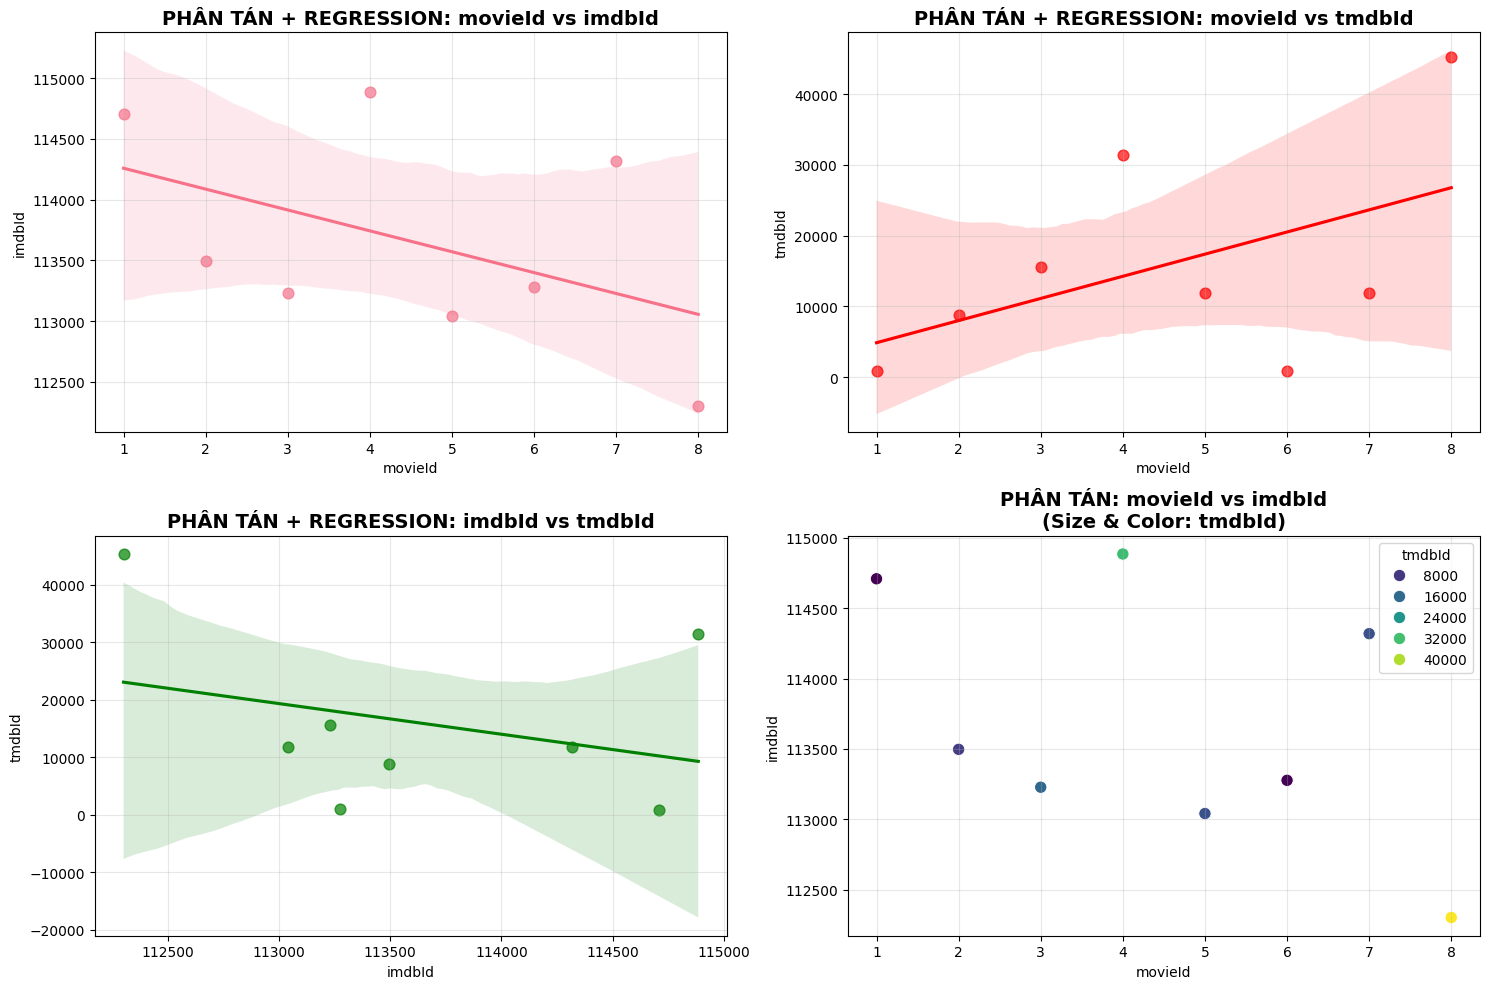

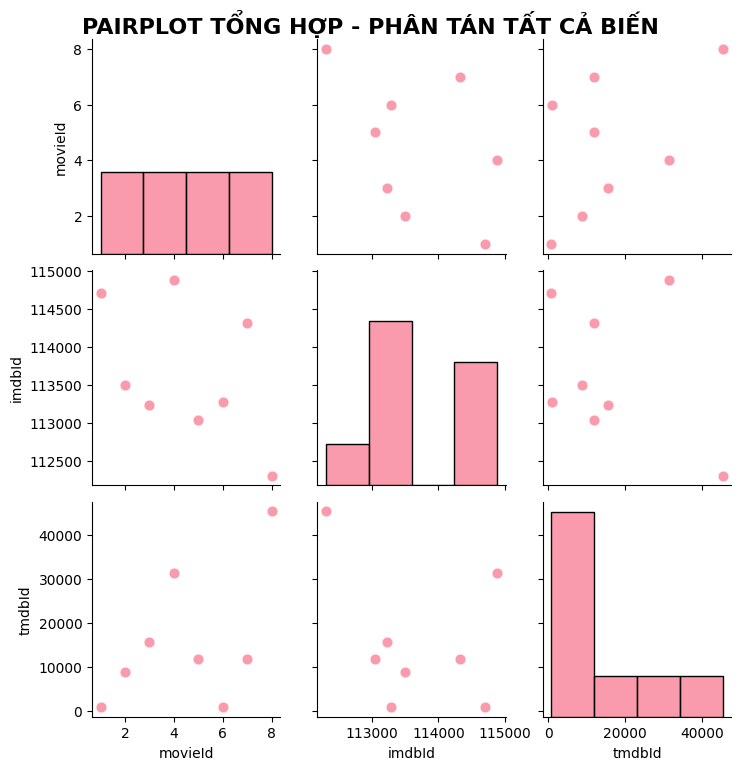

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Thiết lập style
plt.style.use('default')
sns.set_palette("husl")

# Tạo figure với subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Biểu đồ phân tán: movieId vs imdbId
axes[0,0].scatter(df['movieId'], df['imdbId'], alpha=0.7, s=60, color='blue')
axes[0,0].set_title('PHÂN TÁN: movieId vs imdbId', fontsize=14, fontweight='bold')
axes[0,0].set_xlabel('movieId')
axes[0,0].set_ylabel('imdbId')
axes[0,0].grid(True, alpha=0.3)

# 2. Biểu đồ phân tán: movieId vs tmdbId
axes[0,1].scatter(df['movieId'], df['tmdbId'], alpha=0.7, s=60, color='red')
axes[0,1].set_title('PHÂN TÁN: movieId vs tmdbId', fontsize=14, fontweight='bold')
axes[0,1].set_xlabel('movieId')
axes[0,1].set_ylabel('tmdbId')
axes[0,1].grid(True, alpha=0.3)

# 3. Biểu đồ phân tán: imdbId vs tmdbId
axes[1,0].scatter(df['imdbId'], df['tmdbId'], alpha=0.7, s=60, color='green')
axes[1,0].set_title('PHÂN TÁN: imdbId vs tmdbId', fontsize=14, fontweight='bold')
axes[1,0].set_xlabel('imdbId')
axes[1,0].set_ylabel('tmdbId')
axes[1,0].grid(True, alpha=0.3)

# 4. Biểu đồ phân tán 3D thu nhỏ (sử dụng màu sắc)
scatter = axes[1,1].scatter(df['movieId'], df['imdbId'], c=df['tmdbId'],
                           alpha=0.7, s=60, cmap='viridis')
axes[1,1].set_title('PHÂN TÁN: movieId vs imdbId\n(Màu: tmdbId)', fontsize=14, fontweight='bold')
axes[1,1].set_xlabel('movieId')
axes[1,1].set_ylabel('imdbId')
plt.colorbar(scatter, ax=axes[1,1], label='tmdbId')
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# BIỂU ĐỒ PHÂN TÁN KẾT HỢP VỚI REGRESSION
plt.figure(figsize=(15, 10))

# 1. movieId vs imdbId với regression line
plt.subplot(2, 2, 1)
sns.regplot(x='movieId', y='imdbId', data=df, scatter_kws={'alpha':0.7, 's':60})
plt.title('PHÂN TÁN + REGRESSION: movieId vs imdbId', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

# 2. movieId vs tmdbId với regression line
plt.subplot(2, 2, 2)
sns.regplot(x='movieId', y='tmdbId', data=df, scatter_kws={'alpha':0.7, 's':60}, color='red')
plt.title('PHÂN TÁN + REGRESSION: movieId vs tmdbId', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

# 3. imdbId vs tmdbId với regression line
plt.subplot(2, 2, 3)
sns.regplot(x='imdbId', y='tmdbId', data=df, scatter_kws={'alpha':0.7, 's':60}, color='green')
plt.title('PHÂN TÁN + REGRESSION: imdbId vs tmdbId', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

# 4. Biểu đồ phân tán pairplot
plt.subplot(2, 2, 4)
sns.scatterplot(x='movieId', y='imdbId', hue='tmdbId', data=df, palette='viridis', s=80)
plt.title('PHÂN TÁN: movieId vs imdbId\n(Size & Color: tmdbId)', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# PAIRPLOT TỔNG HỢP
sns.pairplot(df, diag_kind='hist', corner=False,
             plot_kws={'alpha':0.7, 's':60},
             diag_kws={'alpha':0.7})
plt.suptitle('PAIRPLOT TỔNG HỢP - PHÂN TÁN TẤT CẢ BIẾN',
             y=1.02, fontsize=16, fontweight='bold')
plt.show()

#2.BỘ DỮ LIỆU CỦA MOVIES


## 2.1.Data cleaing

###**2.1.1 Chuẩn bị và Kiểm tra an toàn**

In [ ]:
dff = pd.read_csv('/content/drive/MyDrive/PTDL_PY/Bản sao của movies.csv')
display(df)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
87580,292731,The Monroy Affaire (2022),Drama
87581,292737,Shelter in Solitude (2023),Comedy|Drama
87582,292753,Orca (2023),Drama
87583,292755,The Angry Breed (1968),Drama


###**2.1.2. Xử lý Giá trị Bị thiếu (Missing Values)**

In [ ]:
print(df.isnull().sum())


movieId    0
title      0
genres     0
dtype: int64


**Đánh giá**

- không có cột có giá trị bị null

###2.1.3.Thông tin tổng quan về các cột

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87585 entries, 0 to 87584
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  87585 non-null  int64 
 1   title    87585 non-null  object
 2   genres   87585 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.0+ MB


##**2.2.EDA Và Trực Quan Hóa Dữ Liệu**

###**2.2.1. PHÂN TÍCH THỂ LOẠI (GENRES)**

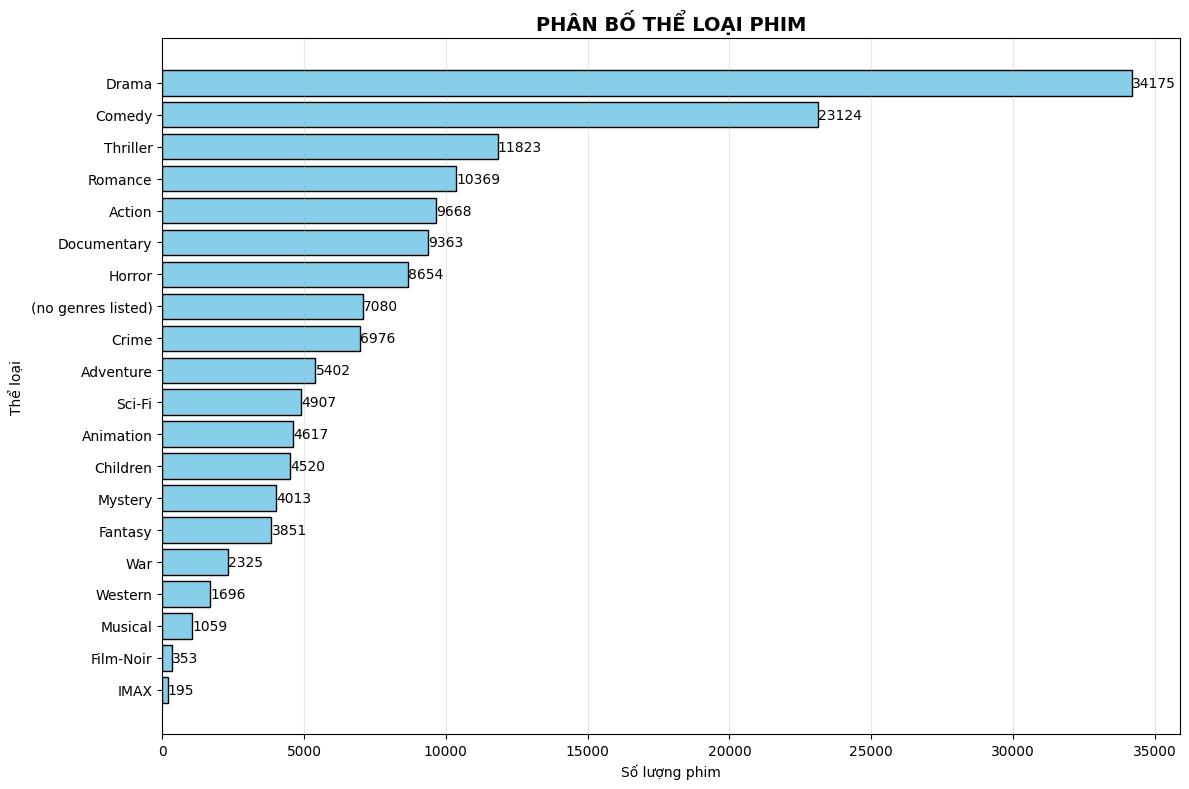

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import numpy as np

# Thiết lập style
plt.style.use('default')
sns.set_palette("husl")

# 1. PHÂN TÍCH THỂ LOẠI (GENRES)
# Tách các thể loại
all_genres = []
for genres in df['genres']:
    if isinstance(genres, str):
        genre_list = [genre.strip() for genre in genres.split('|')]
        all_genres.extend(genre_list)

genre_counts = Counter(all_genres)

# Biểu đồ 1: Phân bố thể loại phim
plt.figure(figsize=(12, 8))
genres_df = pd.DataFrame(genre_counts.items(), columns=['Genre', 'Count']).sort_values('Count', ascending=True)
plt.barh(genres_df['Genre'], genres_df['Count'], color='skyblue', edgecolor='black')
plt.xlabel('Số lượng phim')
plt.ylabel('Thể loại')
plt.title('PHÂN BỐ THỂ LOẠI PHIM', fontsize=14, fontweight='bold')
plt.grid(axis='x', alpha=0.3)
for i, v in enumerate(genres_df['Count']):
    plt.text(v + 0.1, i, str(v), va='center')
plt.tight_layout()
plt.show()

 ### **2.2.2.BIỂU ĐỒ SỐ LƯỢNG THỂ LOẠI MỖI PHIM**

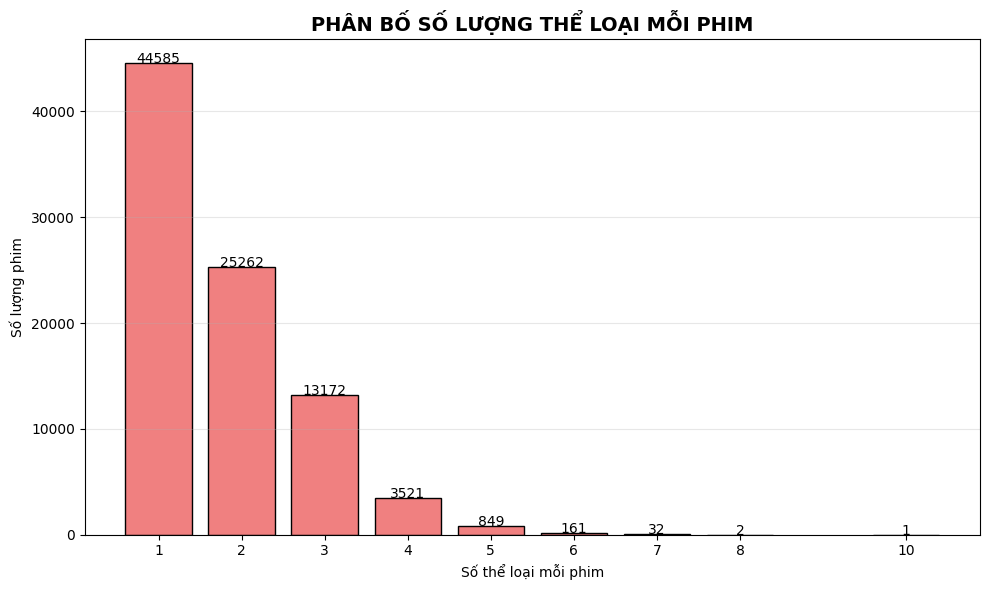

In [ ]:
# 2. BIỂU ĐỒ SỐ LƯỢNG THỂ LOẠI MỖI PHIM
plt.figure(figsize=(10, 6))
df['num_genres'] = df['genres'].apply(lambda x: len(x.split('|')) if isinstance(x, str) else 0)
genre_count_dist = df['num_genres'].value_counts().sort_index()

plt.bar(genre_count_dist.index, genre_count_dist.values, color='lightcoral', edgecolor='black')
plt.xlabel('Số thể loại mỗi phim')
plt.ylabel('Số lượng phim')
plt.title('PHÂN BỐ SỐ LƯỢNG THỂ LOẠI MỖI PHIM', fontsize=14, fontweight='bold')
plt.xticks(genre_count_dist.index)
plt.grid(axis='y', alpha=0.3)
for i, v in enumerate(genre_count_dist.values):
    plt.text(genre_count_dist.index[i], v + 0.1, str(v), ha='center')
plt.tight_layout()
plt.show()

###**2.2.3.BIỂU ĐỒ PIE CHART THỂ LOẠI**

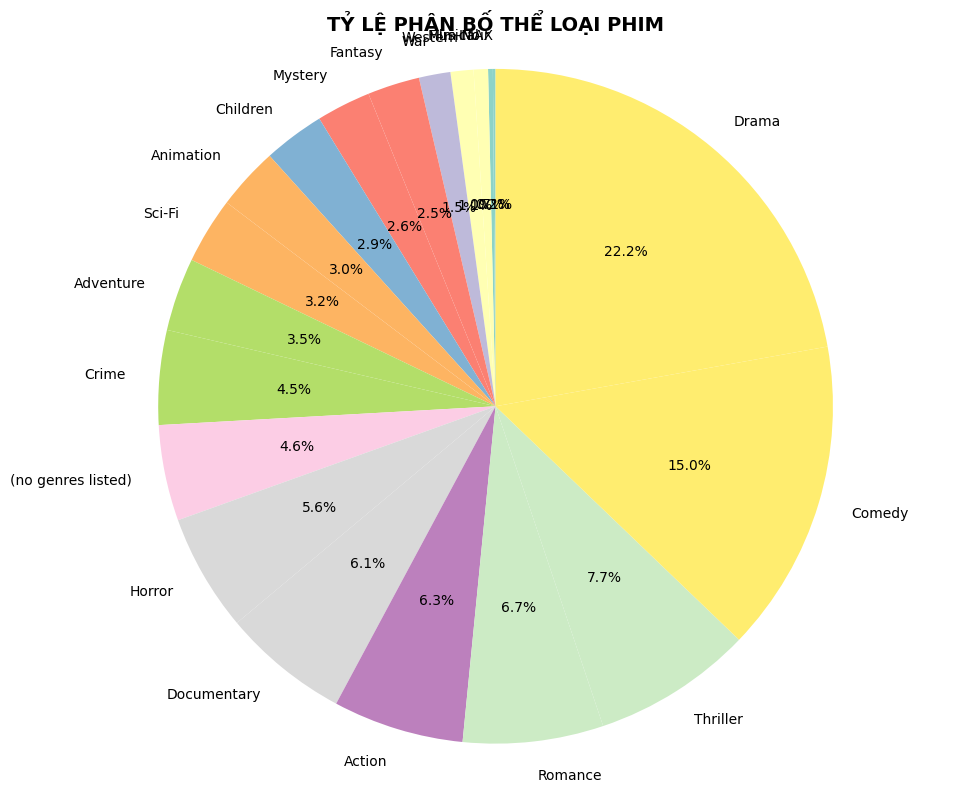

In [ ]:

# 3. BIỂU ĐỒ PIE CHART THỂ LOẠI
plt.figure(figsize=(10, 8))
colors = plt.cm.Set3(np.linspace(0, 1, len(genre_counts)))
plt.pie(genres_df['Count'], labels=genres_df['Genre'], autopct='%1.1f%%',
        startangle=90, colors=colors)
plt.title('TỶ LỆ PHÂN BỐ THỂ LOẠI PHIM', fontsize=14, fontweight='bold')
plt.axis('equal')
plt.tight_layout()
plt.show()

###**2.2.4.TOP 5 THỂ LOẠI PHỔ BIẾN NHẤT**

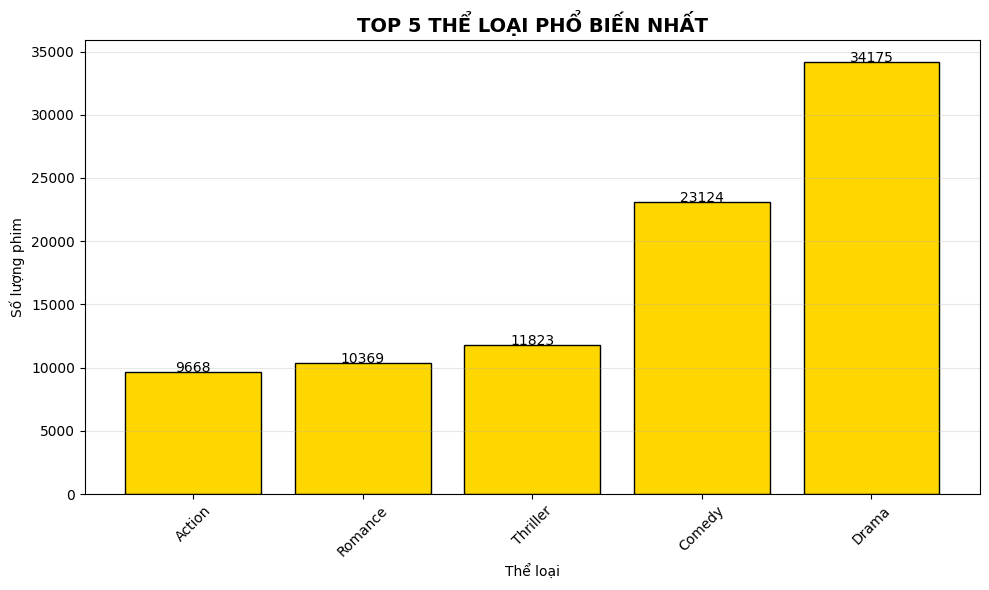

In [ ]:
# 4. BIỂU ĐỒ TOP 5 THỂ LOẠI PHỔ BIẾN NHẤT
plt.figure(figsize=(10, 6))
top_genres = genres_df.tail(5)  # Top 5 thể loại phổ biến nhất
plt.bar(top_genres['Genre'], top_genres['Count'], color='gold', edgecolor='black')
plt.xlabel('Thể loại')
plt.ylabel('Số lượng phim')
plt.title('TOP 5 THỂ LOẠI PHỔ BIẾN NHẤT', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
for i, v in enumerate(top_genres['Count']):
    plt.text(i, v + 0.1, str(v), ha='center')
plt.tight_layout()
plt.show()

#**3.BỘ DỮ LIỆU CỦA TAGS**

## 3.1.Data cleaing

###**3.1.1 Chuẩn bị và Kiểm tra an toàn**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/PTDL_PY/Bản sao của tags.csv')
display(df)

,userId,movieId,tag,timestamp
0,22,26479,Kevin Kline,1583038886
1,22,79592,misogyny,1581476297
2,22,247150,acrophobia,1622483469
3,34,2174,music,1249808064
4,34,2174,weird,1249808102
...,...,...,...,...
2000067,162279,90645,Rafe Spall,1320817734
2000068,162279,91079,Anton Yelchin,1322337407
2000069,162279,91079,Felicity Jones,1322337400
2000070,162279,91658,Rooney Mara,1325828398


###**3.1.2. Xử lý Giá trị Bị thiếu (Missing Values)**

In [ ]:
print(df.isnull().sum())


userId        0
movieId       0
tag          17
timestamp     0
dtype: int64


**Đánh giá**

- cột tag có 17 giá trị bị null

###**3.1.3. Loại bỏ các giá trị bị thiếu**

In [ ]:
df.dropna(subset=['tag'], inplace=True)

###**3.1.4. Kiểm tra lại Dữ liệu sau khi Làm sạch**

In [ ]:
print(df.isnull().sum())

userId       0
movieId      0
tag          0
timestamp    0
dtype: int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2000055 entries, 0 to 2000071
Data columns (total 4 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   userId     int64 
 1   movieId    int64 
 2   tag        object
 3   timestamp  int64 
dtypes: int64(3), object(1)
memory usage: 76.3+ MB


##**3.2.EDA Và Trực Quan Hóa Dữ Liệu**

###**3.2.1.TOP 10 TAG PHỔ BIẾN**

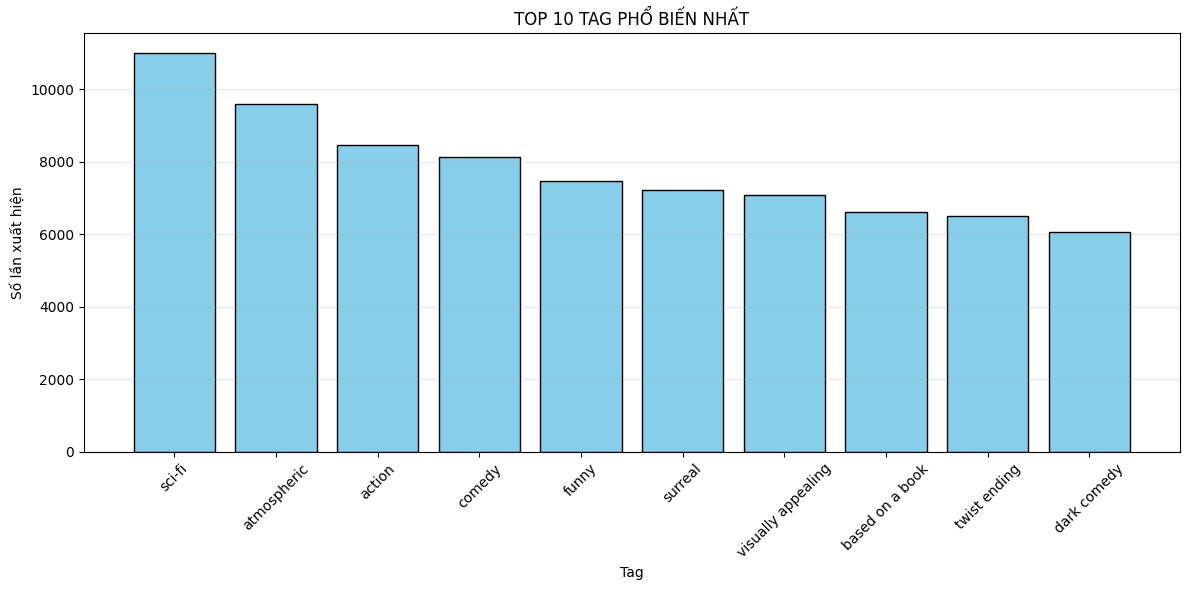

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Thiết lập style đơn giản
plt.style.use('default')

# 1. BIỂU ĐỒ CỘT - TOP 10 TAG PHỔ BIẾN
plt.figure(figsize=(12, 6))
tag_counts = df['tag'].value_counts().head(10)
plt.bar(tag_counts.index, tag_counts.values, color='skyblue', edgecolor='black')
plt.title('TOP 10 TAG PHỔ BIẾN NHẤT')
plt.xlabel('Tag')
plt.ylabel('Số lần xuất hiện')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

###**3.2.2.Top 10 movie được tag nhiều nhất**

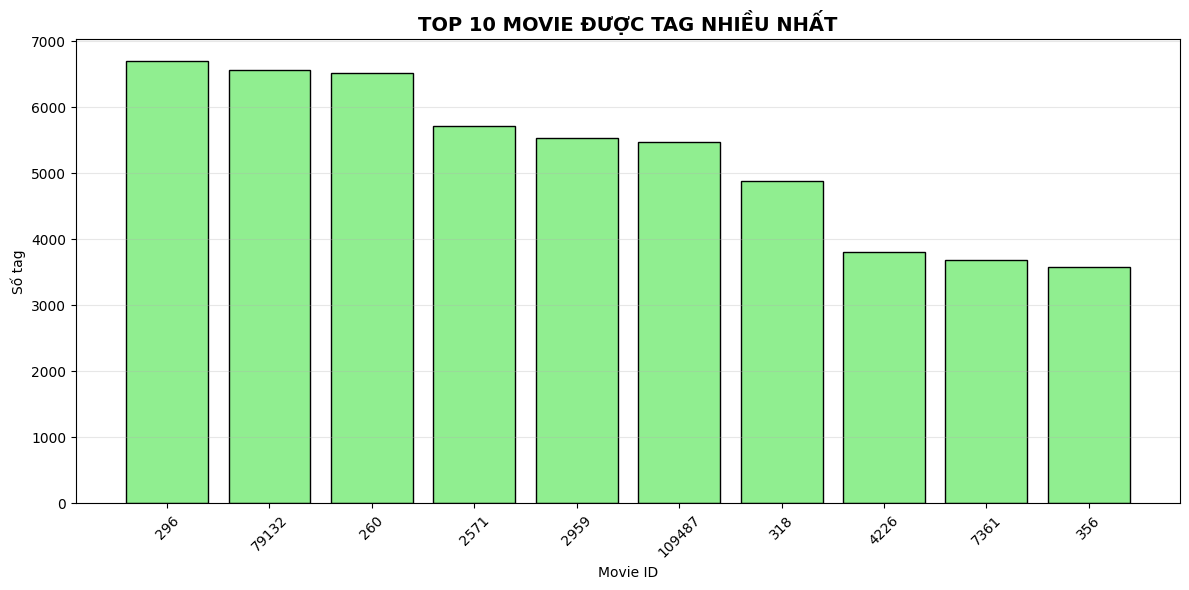

In [ ]:
# Top 10 movie được tag nhiều nhất
movie_counts = df['movieId'].value_counts().head(10)

# Create a new figure and axes for this plot
fig, ax = plt.subplots(figsize=(12, 6))

ax.bar(movie_counts.index.astype(str), movie_counts.values, color='lightgreen', edgecolor='black')
ax.set_title('TOP 10 MOVIE ĐƯỢC TAG NHIỀU NHẤT', fontsize=14, fontweight='bold')
ax.set_xlabel('Movie ID')
ax.set_ylabel('Số tag')
ax.tick_params(axis='x', rotation=45)
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

###**3.2.3.BIỂU ĐỒ TRÒN - PHÂN BỐ ĐỘ DÀI TAG**

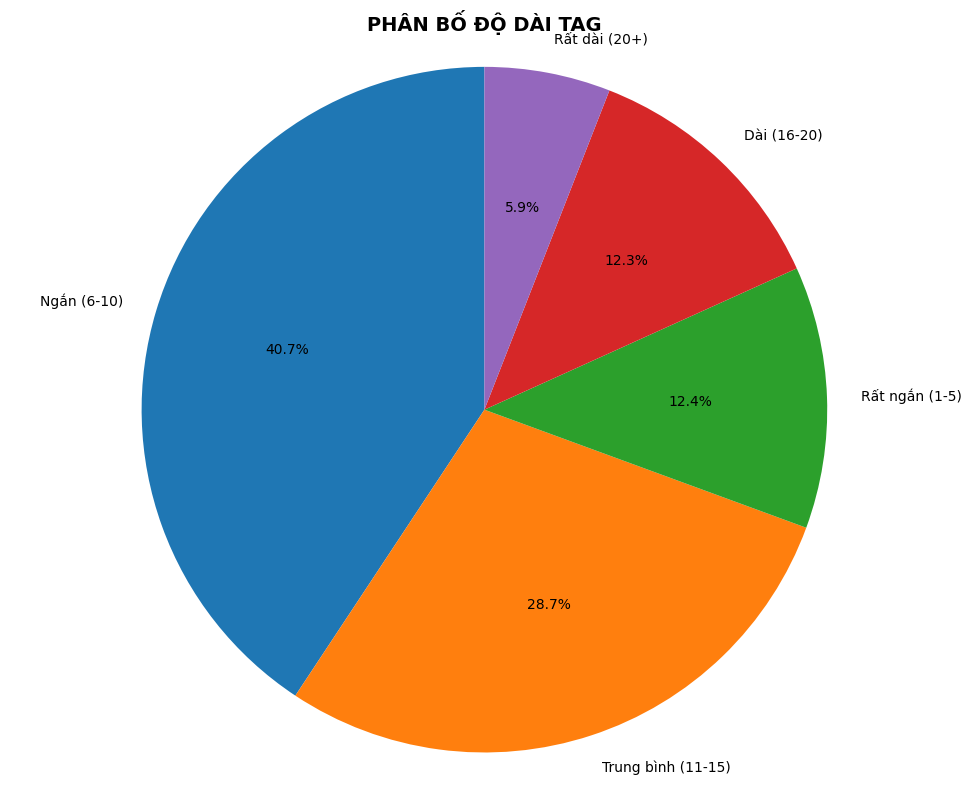

In [ ]:

# 4. BIỂU ĐỒ TRÒN - PHÂN BỐ ĐỘ DÀI TAG
plt.figure(figsize=(10, 8))
df['tag_length'] = df['tag'].str.len()
length_categories = pd.cut(df['tag_length'],
                          bins=[0, 5, 10, 15, 20, 100],
                          labels=['Rất ngắn (1-5)', 'Ngắn (6-10)', 'Trung bình (11-15)',
                                 'Dài (16-20)', 'Rất dài (20+)'])
length_counts = length_categories.value_counts()
plt.pie(length_counts.values, labels=length_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('PHÂN BỐ ĐỘ DÀI TAG', fontsize=14, fontweight='bold')
plt.axis('equal')
plt.tight_layout()
plt.show()

###**3.2.4.bIỂU ĐỒ DONUT - TỔNG QUAN DỮ LIỆU**

In [ ]:
import warnings
warnings.filterwarnings('ignore')

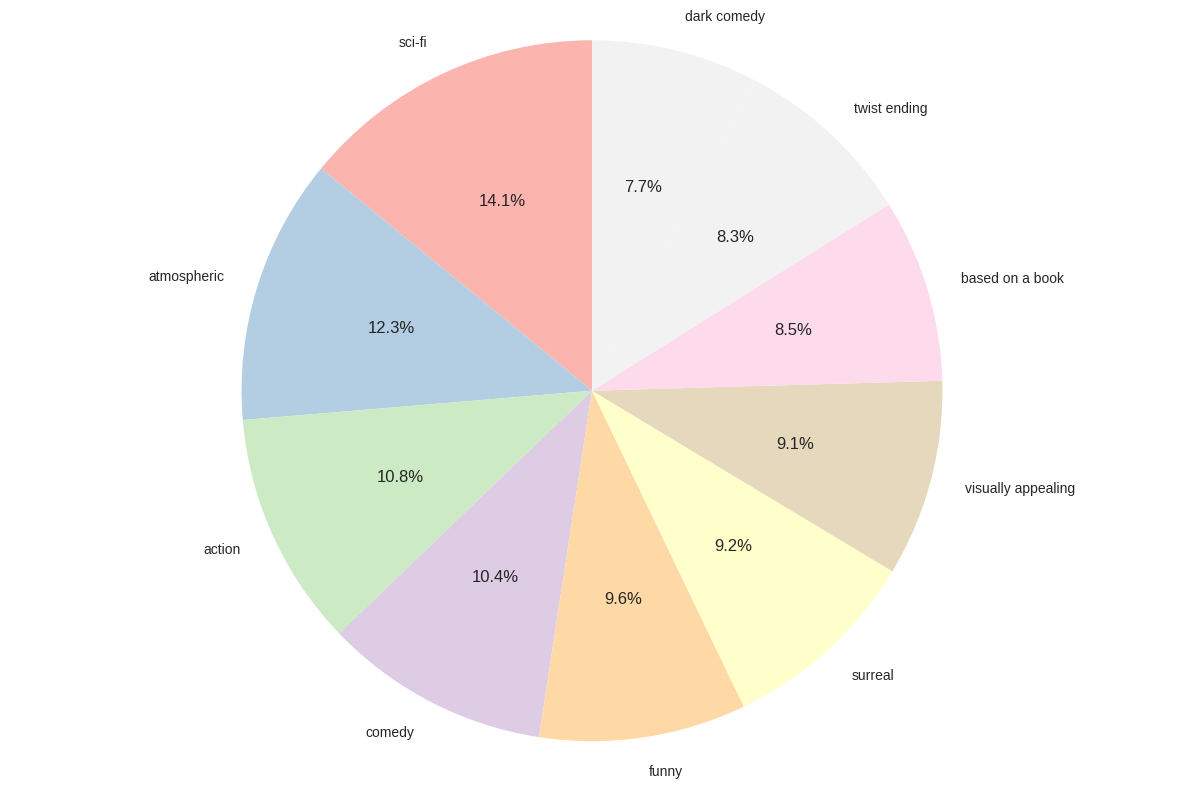

In [ ]:
# 2. BIỂU ĐỒ TRÒN - TOP 10 TAG
plt.figure(figsize=(12, 8))
tag_counts = df['tag'].value_counts().head(10)
colors = plt.cm.Pastel1(range(len(tag_counts)))

plt.pie(tag_counts.values, labels=tag_counts.index,
        colors=colors, autopct='%1.1f%%', startangle=90)

plt.axis('equal')
plt.tight_layout()
plt.show()

#**4.BỘ DỮ LIỆU CỦA RATINGS**

##**4.1.Tiền xử lý dữ liệu**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/PTDL_PY/Bản sao của ratings.csv')
display(df)

,userId,movieId,rating,timestamp
0,1,17,4.0,944249077
1,1,25,1.0,944250228
2,1,29,2.0,943230976
3,1,30,5.0,944249077
4,1,32,5.0,943228858
...,...,...,...,...
32000199,200948,79702,4.5,1294412589
32000200,200948,79796,1.0,1287216292
32000201,200948,80350,0.5,1294412671
32000202,200948,80463,3.5,1350423800


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

###**4.1.1.Đánh giá tổng quan diuwx liệu**

In [ ]:
print("=" * 60)
print("BƯỚC 1: KHẢO SÁT DỮ LIỆU BAN ĐẦU")
print("=" * 60)

print(f"Kích thước dữ liệu: {df.shape}")
print(f"\nThông tin các cột:")
print(df.info())
print(f"\n5 dòng đầu tiên:")
print(df.head())
print(f"\nThống kê mô tả:")
print(df.describe())

BƯỚC 1: KHẢO SÁT DỮ LIỆU BAN ĐẦU
Kích thước dữ liệu: (32000204, 4)

Thông tin các cột:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32000204 entries, 0 to 32000203
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 976.6 MB
None

5 dòng đầu tiên:
   userId  movieId  rating  timestamp
0       1       17     4.0  944249077
1       1       25     1.0  944250228
2       1       29     2.0  943230976
3       1       30     5.0  944249077
4       1       32     5.0  943228858

Thống kê mô tả:
             userId       movieId        rating     timestamp
count  3.200020e+07  3.200020e+07  3.200020e+07  3.200020e+07
mean   1.002785e+05  2.931861e+04  3.540396e+00  1.275241e+09
std    5.794905e+04  5.095816e+04  1.058986e+00  2.561630e+08
min    1.000000e+00  1.000000e+00  5.000000e-01  7.896520e+08
25%    5.005300e+04  1.23

###**4.1.2.KIỂM TRA GIÁ TRỊ THIẾU**

In [ ]:
print("\n" + "=" * 60)
print("BƯỚC 2: KIỂM TRA GIÁ TRỊ THIẾU")
print("=" * 60)

missing_data = df.isnull().sum()
missing_percent = (df.isnull().sum() / len(df)) * 100
missing_info = pd.DataFrame({
    'Số lượng thiếu': missing_data,
    'Tỷ lệ thiếu (%)': missing_percent
})
print(missing_info)



BƯỚC 2: KIỂM TRA GIÁ TRỊ THIẾU
           Số lượng thiếu  Tỷ lệ thiếu (%)
userId                  0              0.0
movieId                 0              0.0
rating                  0              0.0
timestamp               0              0.0


**Đánh giá:**
- Không có giá trị nào bị thiếu

###**4.1.3.KIỂM TRA GIÁ TRỊ TRÙNG LẶP**

In [ ]:
print("\n" + "=" * 60)
print("BƯỚC 3: KIỂM TRA GIÁ TRỊ TRÙNG LẶP")
print("=" * 60)

# Kiểm tra trùng lặp hoàn toàn
duplicates = df.duplicated().sum()
print(f"Số bản ghi trùng lặp hoàn toàn: {duplicates}")

# Kiểm tra trùng lặp theo user-movie (1 user chỉ nên rating 1 movie 1 lần)
user_movie_duplicates = df.duplicated(subset=['userId', 'movieId']).sum()
print(f"Số bản ghi trùng lặp userId-movieId: {user_movie_duplicates}")

if user_movie_duplicates > 0:
    print("\nCác bản ghi trùng lặp userId-movieId:")
    duplicates_df = df[df.duplicated(subset=['userId', 'movieId'], keep=False)]
    print(duplicates_df.sort_values(['userId', 'movieId']))



BƯỚC 3: KIỂM TRA GIÁ TRỊ TRÙNG LẶP
Số bản ghi trùng lặp hoàn toàn: 0
Số bản ghi trùng lặp userId-movieId: 0


**Đánh giá**
- Số bản ghi trùng lặp hoàn toàn: 0
- Số bản ghi trùng lặp userId-movieId: 0

##**4.2.EDA Và Trực Quan Hóa Dữ Liệu**

###**4.2.1.PHÂN TÍCH ĐƠN BIẾN**

####**4.2.1.1. Phân phối rating**

**Câu hỏi: "Phân phối điểm rating từ 1-5 sao như thế nào? Xu hướng đánh giá của người dùng thiên về điểm cao hay điểm thấp?"**

**Mục tiêu:**

- Hiểu được xu hướng đánh giá tổng thể

- Xác định xem người dùng có tích cực trong đánh giá không

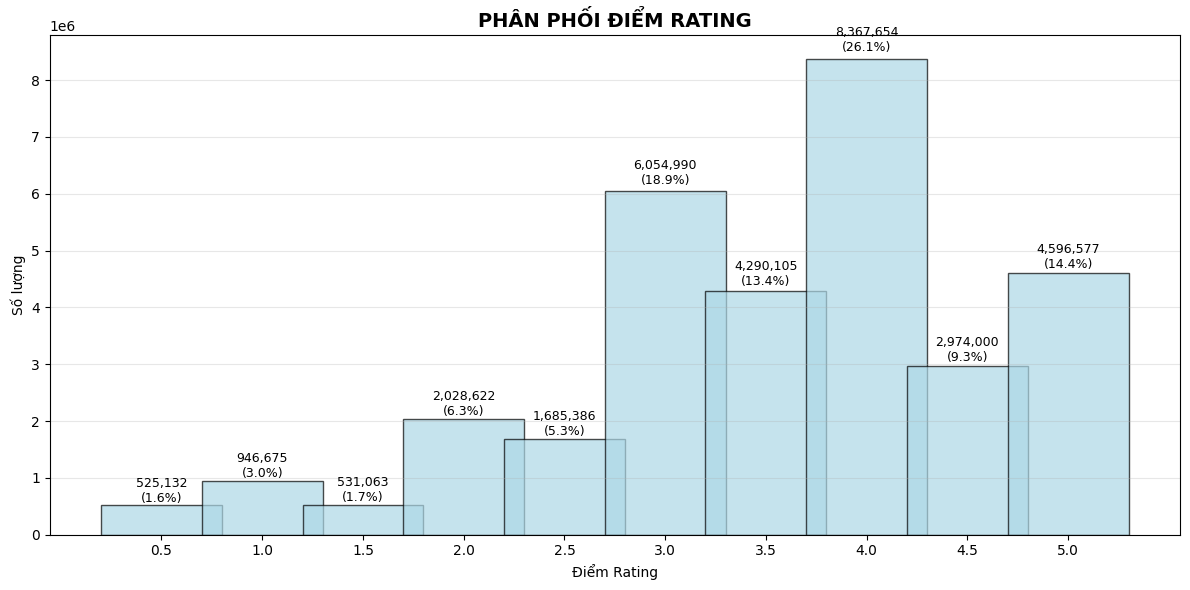

THỐNG KÊ PHÂN PHỐI RATING:
Rating 0.5: 525,132 lượt (1.6%)
Rating 1.0: 946,675 lượt (3.0%)
Rating 1.5: 531,063 lượt (1.7%)
Rating 2.0: 2,028,622 lượt (6.3%)
Rating 2.5: 1,685,386 lượt (5.3%)
Rating 3.0: 6,054,990 lượt (18.9%)
Rating 3.5: 4,290,105 lượt (13.4%)
Rating 4.0: 8,367,654 lượt (26.1%)
Rating 4.5: 2,974,000 lượt (9.3%)
Rating 5.0: 4,596,577 lượt (14.4%)


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Sửa lỗi font chữ
plt.rcParams['font.sans-serif'] = ['DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False

# Phân phối rating
rating_counts = df['rating'].value_counts().sort_index()

# Tạo biểu đồ cột với khoảng cách giữa các cột
plt.figure(figsize=(12, 6))
bars = plt.bar(rating_counts.index, rating_counts.values,
               width=0.6,  # Giảm độ rộng cột
               color='lightblue', edgecolor='black', alpha=0.7)

plt.title('PHÂN PHỐI ĐIỂM RATING', fontsize=14, fontweight='bold')
plt.xlabel('Điểm Rating')
plt.ylabel('Số lượng')
plt.grid(axis='y', alpha=0.3)

# Điều chỉnh trục x để có khoảng cách giữa các cột
plt.xticks(rating_counts.index)

# Thêm giá trị trên các cột
for bar, count in zip(bars, rating_counts.values):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + (height * 0.01),
            f'{count:,}\n({count/len(df)*100:.1f}%)',
            ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# Hiển thị thống kê
print("THỐNG KÊ PHÂN PHỐI RATING:")
for rating, count in rating_counts.items():
    print(f"Rating {rating}: {count:,} lượt ({count/len(df)*100:.1f}%)")

ĐÁNH GIÁ PHÂN PHỐI RATING:

**XU HƯỚNG TÍCH CỰC:**

- 50% rating từ 4.0 sao trở lên

- Rating 4.0 sao chiếm cao nhất (26.1%)

- Rating tích cực (4.0-5.0) chiếm 49.8%


**NHẬN XÉT:**

- Người dùng có xu hướng rating khá tích cực

- Rating trung bình (~3.5-4.0) khá cao

- Có sự chênh lệch rõ giữa rating cao (4.0) và thấp (1.0-2.0)

**KẾT LUẬN:** Dữ liệu cho thấy người dùng hài lòng với các bộ phim và có xu hướng đánh giá tích cực.

####**4.2.1.2. Phân bố mức độ hữu ích**

**Câu hỏi: "Phân bố của cột 'useful' như thế nào? Đa số rating có được đánh giá là hữu ích hay không?"**

**Mục tiêu:**

- Đánh giá chất lượng các rating

- Hiểu được giá trị trung bình của độ hữu ích

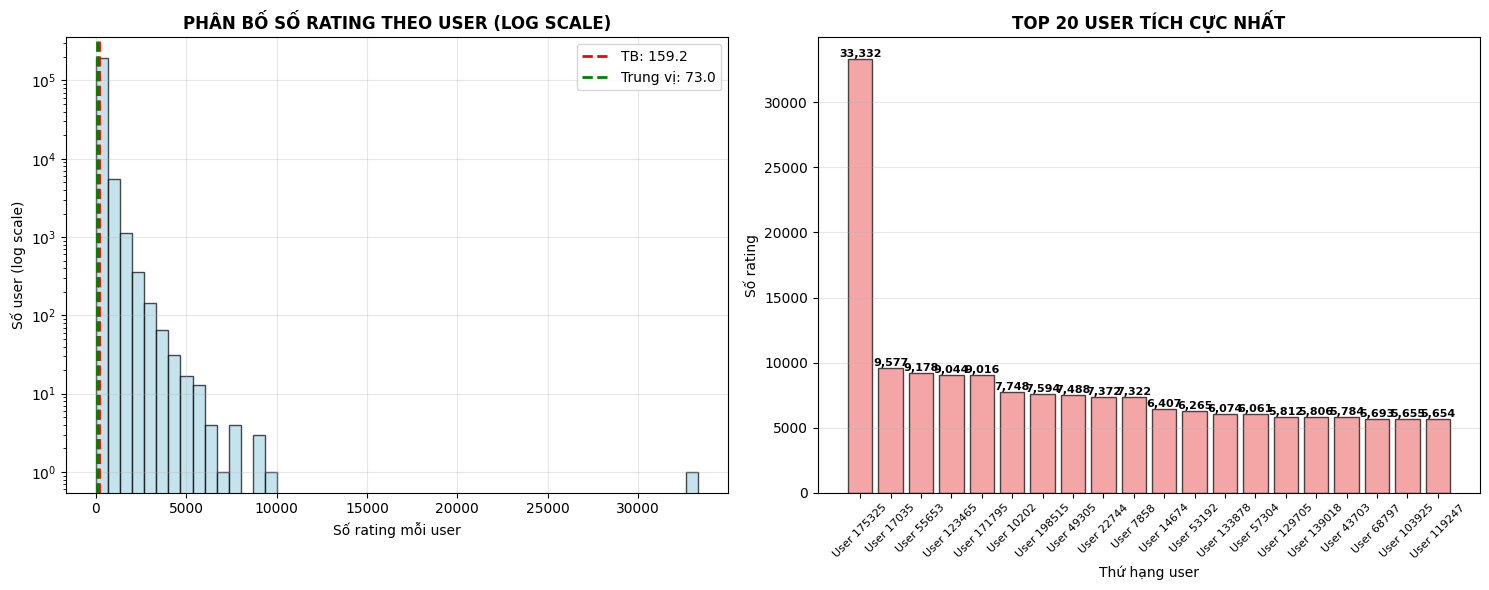

THỐNG KÊ CHI TIẾT PHÂN BỐ RATING THEO USER
📊 Tổng số rating: 32,000,204
👥 Số user duy nhất: 200,948
📈 Số rating trung bình mỗi user: 159.2
📉 Số rating trung vị mỗi user: 73.0
🔥 User nhiều rating nhất: 33,332 rating
❄️ User ít rating nhất: 20 rating
📏 Độ lệch chuẩn: 282.0

📋 PHÂN TÍCH PHÂN PHỐI:
• 25% user có dưới 36 rating
• 50% user có dưới 73 rating
• 75% user có dưới 167 rating

🏆 TOP 5 USER TÍCH CỰC NHẤT:
1. User 175325: 33,332 rating (0.10% tổng rating)
2. User 17035: 9,577 rating (0.03% tổng rating)
3. User 55653: 9,178 rating (0.03% tổng rating)
4. User 123465: 9,044 rating (0.03% tổng rating)
5. User 171795: 9,016 rating (0.03% tổng rating)


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Sửa lỗi font chữ
plt.rcParams['font.sans-serif'] = ['DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False

# Đếm số rating của mỗi user
user_rating_counts = df['userId'].value_counts()

# Tạo biểu đồ với 2 subplot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Biểu đồ 1: Histogram với bins nhỏ hơn và log scale
ax1.hist(user_rating_counts.values, bins=50, color='lightblue',
         alpha=0.7, edgecolor='black', log=True)
ax1.set_title('PHÂN BỐ SỐ RATING THEO USER (LOG SCALE)', fontsize=12, fontweight='bold')
ax1.set_xlabel('Số rating mỗi user')
ax1.set_ylabel('Số user (log scale)')
ax1.grid(alpha=0.3)

# Thêm đường trung bình và trung vị
mean_ratings = user_rating_counts.mean()
median_ratings = user_rating_counts.median()
ax1.axvline(mean_ratings, color='red', linestyle='--', linewidth=2, label=f'TB: {mean_ratings:.1f}')
ax1.axvline(median_ratings, color='green', linestyle='--', linewidth=2, label=f'Trung vị: {median_ratings:.1f}')
ax1.legend()

# Biểu đồ 2: Top 20 user tích cực nhất
top_20_users = user_rating_counts.head(20)
bars = ax2.bar(range(len(top_20_users)), top_20_users.values,
               color='lightcoral', alpha=0.7, edgecolor='black')
ax2.set_title('TOP 20 USER TÍCH CỰC NHẤT', fontsize=12, fontweight='bold')
ax2.set_xlabel('Thứ hạng user')
ax2.set_ylabel('Số rating')
ax2.set_xticks(range(len(top_20_users)))
ax2.set_xticklabels([f'User {i}' for i in top_20_users.index], rotation=45, fontsize=8)
ax2.grid(axis='y', alpha=0.3)

# Thêm số trên các cột
for bar, count in zip(bars, top_20_users.values):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 5, f'{count:,}',
             ha='center', va='bottom', fontsize=8, fontweight='bold')

plt.tight_layout()
plt.show()
# Hiển thị thống kê chi tiết
print("=" * 60)
print("THỐNG KÊ CHI TIẾT PHÂN BỐ RATING THEO USER")
print("=" * 60)
print(f"📊 Tổng số rating: {len(df):,}")
print(f"👥 Số user duy nhất: {df['userId'].nunique():,}")
print(f"📈 Số rating trung bình mỗi user: {mean_ratings:.1f}")
print(f"📉 Số rating trung vị mỗi user: {median_ratings:.1f}")
print(f"🔥 User nhiều rating nhất: {user_rating_counts.max():,} rating")
print(f"❄️ User ít rating nhất: {user_rating_counts.min():,} rating")
print(f"📏 Độ lệch chuẩn: {user_rating_counts.std():.1f}")

# Phân tích phần trăm
print(f"\n📋 PHÂN TÍCH PHÂN PHỐI:")
q25 = user_rating_counts.quantile(0.25)
q75 = user_rating_counts.quantile(0.75)
print(f"• 25% user có dưới {q25:.0f} rating")
print(f"• 50% user có dưới {median_ratings:.0f} rating")
print(f"• 75% user có dưới {q75:.0f} rating")

# Top 5 user
print(f"\n🏆 TOP 5 USER TÍCH CỰC NHẤT:")
top_5_users = user_rating_counts.head()
for i, (user_id, count) in enumerate(top_5_users.items(), 1):
    percentage = (count / len(df)) * 100
    print(f"{i}. User {user_id}: {count:,} rating ({percentage:.2f}% tổng rating)")

###**4.2.2.PHÂN TÍCH ĐA BIẾN**

####**4.2.2.1.Mối quan hệ giữa rating và độ hữu ích**

**Câu hỏi: "Có mối tương quan nào giữa điểm rating và mức độ hữu ích không? Rating cao có thường được đánh giá là hữu ích hơn không?"**

**Mục tiêu:**

- Tìm hiểu yếu tố ảnh hưởng đến độ hữu ích

- Phát hiện pattern trong hành vi người dùng

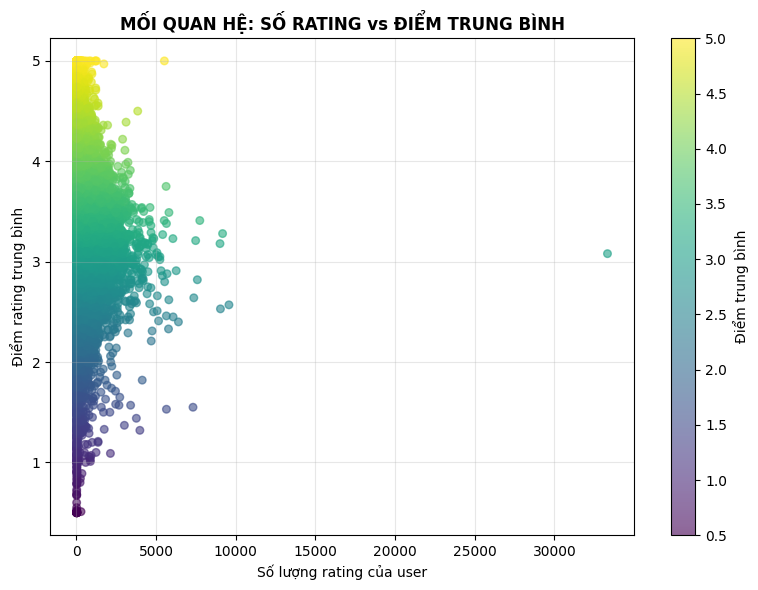

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import datetime

# Sửa lỗi font chữ
plt.rcParams['font.sans-serif'] = ['DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False

# Giả sử df đã được load từ dữ liệu (ví dụ: pd.read_excel('data.xlsx'))
# Nếu chỉ có 1 user, scatter plot sẽ chỉ có 1 điểm; cần dataset lớn hơn để phân tích tương quan.

# Tính số rating và điểm trung bình cho mỗi user
user_stats = df.groupby('userId').agg({
    'rating': ['count', 'mean'],
    'movieId': 'nunique'
}).round(2)
user_stats.columns = ['rating_count', 'rating_mean', 'unique_movies']
user_stats = user_stats.reset_index()

fig, ax1 = plt.subplots(1, 1, figsize=(8, 6))

# Scatter plot
scatter = ax1.scatter(user_stats['rating_count'], user_stats['rating_mean'],
                     c=user_stats['rating_mean'], cmap='viridis', alpha=0.6, s=30)
ax1.set_title('MỐI QUAN HỆ: SỐ RATING vs ĐIỂM TRUNG BÌNH', fontsize=12, fontweight='bold')
ax1.set_xlabel('Số lượng rating của user')
ax1.set_ylabel('Điểm rating trung bình')
ax1.grid(alpha=0.3)
plt.colorbar(scatter, ax=ax1, label='Điểm trung bình')

plt.tight_layout()
plt.show()

**Xu hướng chính:**

- Phân bố không đồng đều: Hầu hết phim có số rating thấp (dưới 10,000), tập trung ở điểm trung bình 3-4 sao.
  - Điều này cho thấy "hiệu ứng long-tail" phổ biến trong dữ liệu rating: Nhiều phim ít được xem/đánh giá (niche films) có điểm cao hơn, trong khi phim phổ biến (blockbusters) nhận nhiều rating hơn nhưng điểm trung bình thấp hơn do đa dạng ý kiến.


####**4.2.2.3.So sánh hành vi rating giữa các user**

**Câu hỏi: "Có sự khác biệt nào trong hành vi rating giữa các user không? User nào có xu hướng rating khắt khe/dễ dàng nhất?"**

**Mục tiêu:**

- Phân segment người dùng

- Tìm reviewer tiềm năng

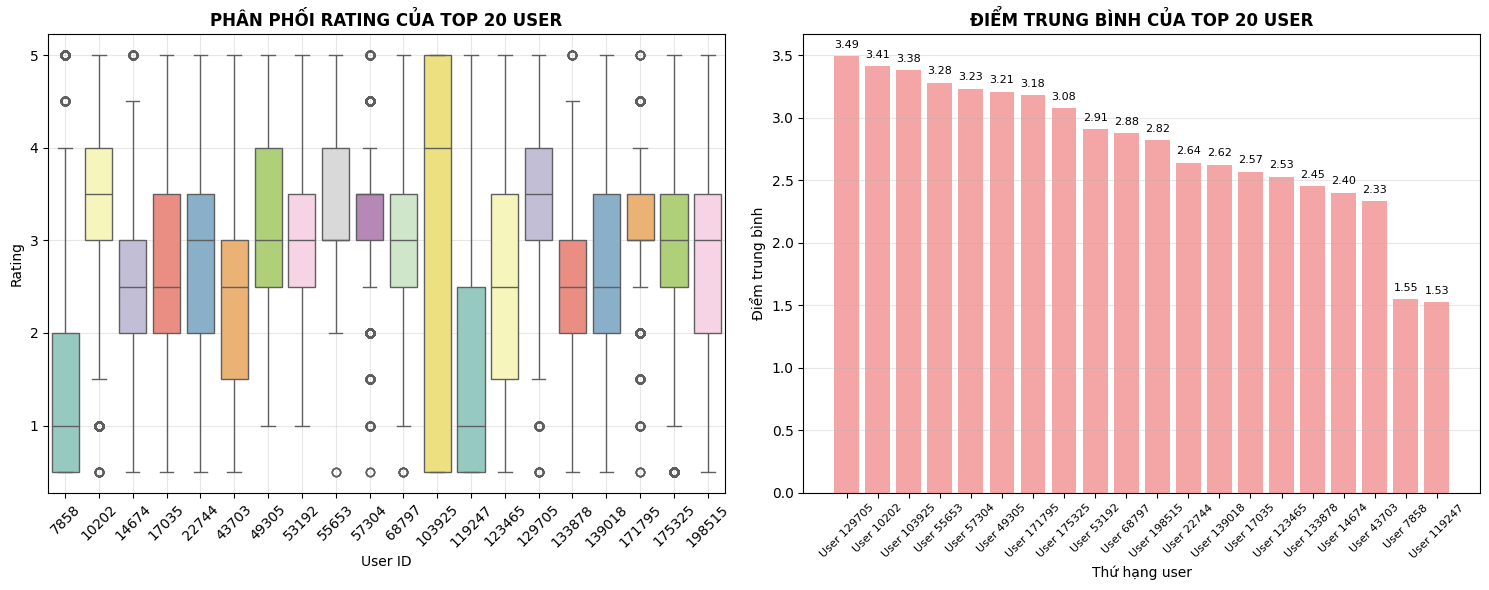

• User khắt khe nhất (điểm TB < 2.5): 5 user
• User dễ dàng nhất (điểm TB > 4.0): 0 user


In [ ]:

# Lấy top 20 user có nhiều rating nhất
top_20_users = df['userId'].value_counts().head(20).index
top_users_data = df[df['userId'].isin(top_20_users)]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Box plot cho top users
sns.boxplot(data=top_users_data, x='userId', y='rating', ax=ax1, palette='Set3')
ax1.set_title('PHÂN PHỐI RATING CỦA TOP 20 USER', fontsize=12, fontweight='bold')
ax1.set_xlabel('User ID')
ax1.set_ylabel('Rating')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(alpha=0.3)

# Bar chart điểm trung bình của top users
user_means = top_users_data.groupby('userId')['rating'].mean().sort_values(ascending=False)
bars = ax2.bar(range(len(user_means)), user_means.values, color='lightcoral', alpha=0.7)
ax2.set_title('ĐIỂM TRUNG BÌNH CỦA TOP 20 USER', fontsize=12, fontweight='bold')
ax2.set_xlabel('Thứ hạng user')
ax2.set_ylabel('Điểm trung bình')
ax2.set_xticks(range(len(user_means)))
ax2.set_xticklabels([f'User {uid}' for uid in user_means.index], rotation=45, fontsize=8)
ax2.grid(axis='y', alpha=0.3)

# Thêm giá trị trên các cột
for bar, value in zip(bars, user_means.values):
    ax2.text(bar.get_x() + bar.get_width()/2., value + 0.05, f'{value:.2f}',
             ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

# Phân loại user
strict_users = user_means[user_means < 2.5]
lenient_users = user_means[user_means > 4.0]
print(f"• User khắt khe nhất (điểm TB < 2.5): {len(strict_users)} user")
print(f"• User dễ dàng nhất (điểm TB > 4.0): {len(lenient_users)} user")


**Xu hướng chính:**

- Giá trị trung bình: User đầu (1290, 1030) có điểm cao nhất cho thấy một số top users lại "harsh grader" – họ xem nhiều nhưng ít hài lòng.

- Xu hướng giảm dần: Từ ~3.5 xuống ~1.5, với độ lệch chuẩn cao (bars không đồng đều). Trung vị ~2.8-3.0, ngụ ý 50% top users đánh giá trên trung bình, 50% dưới.
Insight: Sự chênh lệch lớn (khoảng 2 sao giữa cao/thấp) nhấn mạnh tính cá nhân hóa: Không phải top user nào cũng "dễ tính". Trong hệ thống rating, điều này cảnh báo về cold-start problem (user mới có thể giống harsh users hơn).

####**4.2.2.4.Phân tích rating theo nhóm phim**

**Câu hỏi: "Có sự khác biệt về phân phối rating giữa các nhóm phim khác nhau không? Nhóm phim nào nhận được rating cao nhất?"**

**Mục tiêu:**

- Đánh giá chất lượng từng nhóm phim

- Tìm insights cho recommendation system

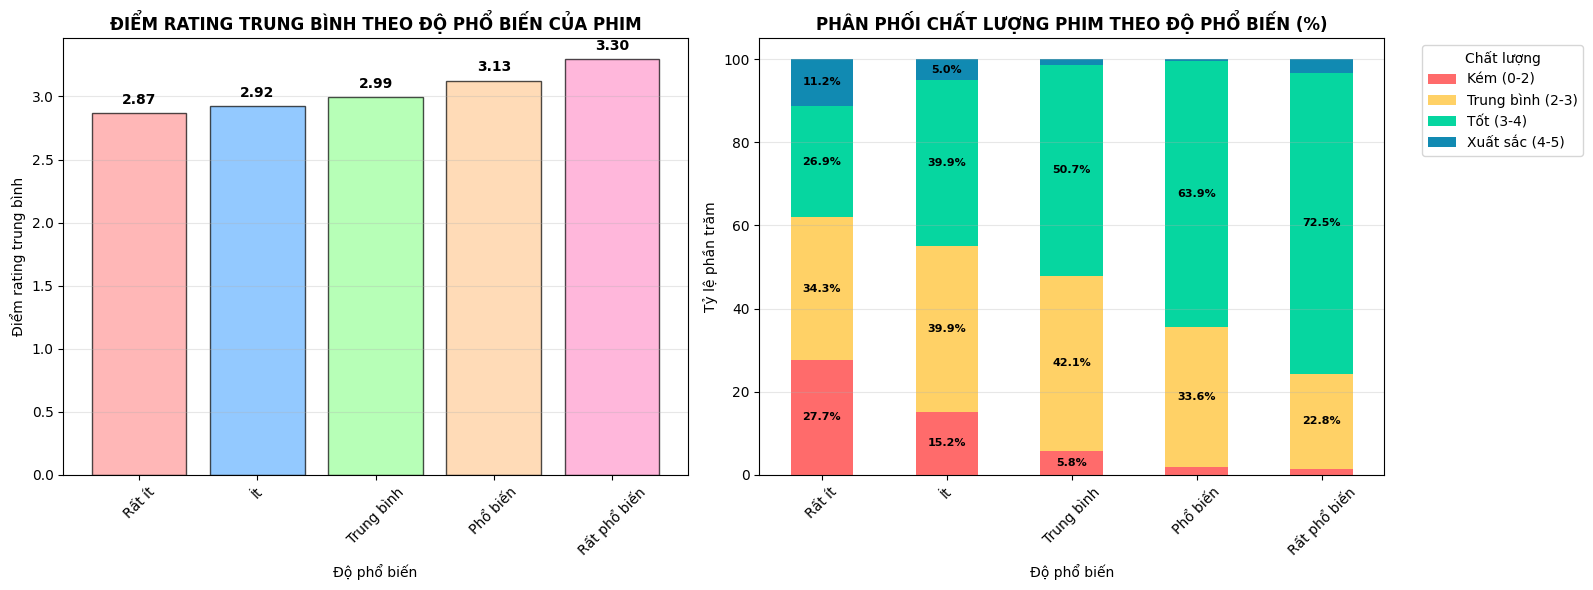

📊 THỐNG KÊ CHI TIẾT THEO ĐỘ PHỔ BIẾN:

🎬 RẤT ÍT:
   • Số phim: 18,607
   • Điểm trung bình: 2.87
   • Số rating trung bình: 1.0

🎬 ÍT:
   • Số phim: 25,420
   • Điểm trung bình: 2.92
   • Số rating trung bình: 3.0

🎬 TRUNG BÌNH:
   • Số phim: 17,547
   • Điểm trung bình: 2.99
   • Số rating trung bình: 10.7

🎬 PHỔ BIẾN:
   • Số phim: 10,713
   • Điểm trung bình: 3.13
   • Số rating trung bình: 45.9

🎬 RẤT PHỔ BIẾN:
   • Số phim: 12,145
   • Điểm trung bình: 3.30
   • Số rating trung bình: 2571.0

📈 XU HƯỚNG:
• Phim càng phổ biến thì điểm rating có xu hướng: CAO hơn
• Chênh lệch điểm: 0.43


In [ ]:
# Tính toán cho các movie
movie_stats = df.groupby('movieId').agg({
    'rating': ['count', 'mean', 'std'],
    'userId': 'nunique'
}).round(3)
movie_stats.columns = ['rating_count', 'rating_mean', 'rating_std', 'unique_users']
movie_stats = movie_stats.reset_index()

# Phân nhóm movie dựa trên số lượng rating
movie_stats['popularity'] = pd.cut(movie_stats['rating_count'],
                                  bins=[0, 1, 5, 20, 100, float('inf')],
                                  labels=['Rất ít', 'Ít', 'Trung bình', 'Phổ biến', 'Rất phổ biến'])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Biểu đồ 1: Bar chart điểm trung bình theo độ phổ biến
popularity_means = movie_stats.groupby('popularity')['rating_mean'].mean().sort_index()
bars1 = ax1.bar(range(len(popularity_means)), popularity_means.values,
                color=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#ff99cc'],
                alpha=0.7, edgecolor='black')

ax1.set_title('ĐIỂM RATING TRUNG BÌNH THEO ĐỘ PHỔ BIẾN CỦA PHIM', fontsize=12, fontweight='bold')
ax1.set_xlabel('Độ phổ biến')
ax1.set_ylabel('Điểm rating trung bình')
ax1.set_xticks(range(len(popularity_means)))
ax1.set_xticklabels(popularity_means.index, rotation=45)
ax1.grid(axis='y', alpha=0.3)

# Thêm giá trị trên các cột
for bar, value in zip(bars1, popularity_means.values):
    ax1.text(bar.get_x() + bar.get_width()/2., value + 0.05, f'{value:.2f}',
             ha='center', va='bottom', fontweight='bold')

# Biểu đồ 2: Stacked bar chart phân phối rating theo nhóm phổ biến
popularity_rating = pd.crosstab(movie_stats['popularity'],
                               pd.cut(movie_stats['rating_mean'],
                                     bins=[0, 2, 3, 4, 5],
                                     labels=['Kém (0-2)', 'Trung bình (2-3)', 'Tốt (3-4)', 'Xuất sắc (4-5)']))
popularity_rating_percent = popularity_rating.div(popularity_rating.sum(axis=1), axis=0) * 100

popularity_rating_percent.plot(kind='bar', stacked=True, ax=ax2,
                              color=['#ff6b6b', '#ffd166', '#06d6a0', '#118ab2'])
ax2.set_title('PHÂN PHỐI CHẤT LƯỢNG PHIM THEO ĐỘ PHỔ BIẾN (%)', fontsize=12, fontweight='bold')
ax2.set_xlabel('Độ phổ biến')
ax2.set_ylabel('Tỷ lệ phần trăm')
ax2.legend(title='Chất lượng', bbox_to_anchor=(1.05, 1), loc='upper left')
ax2.grid(axis='y', alpha=0.3)
ax2.tick_params(axis='x', rotation=45)

# Thêm tỷ lệ phần trăm trên biểu đồ stacked bar
for i, (idx, row) in enumerate(popularity_rating_percent.iterrows()):
    cumulative = 0
    for j, value in enumerate(row):
        if value > 5:  # Chỉ hiển thị nếu lớn hơn 5%
            ax2.text(i, cumulative + value/2, f'{value:.1f}%',
                    ha='center', va='center', fontweight='bold', fontsize=8)
        cumulative += value

plt.tight_layout()
plt.show()

# Thống kê chi tiết
print("📊 THỐNG KÊ CHI TIẾT THEO ĐỘ PHỔ BIẾN:")
print("=" * 50)
for popularity in ['Rất ít', 'Ít', 'Trung bình', 'Phổ biến', 'Rất phổ biến']:
    group_data = movie_stats[movie_stats['popularity'] == popularity]
    if len(group_data) > 0:
        print(f"\n🎬 {popularity.upper()}:")
        print(f"   • Số phim: {len(group_data):,}")
        print(f"   • Điểm trung bình: {group_data['rating_mean'].mean():.2f}")
        print(f"   • Số rating trung bình: {group_data['rating_count'].mean():.1f}")

# Phân tích xu hướng
print(f"\n📈 XU HƯỚNG:")
print(f"• Phim càng phổ biến thì điểm rating có xu hướng: {'CAO' if popularity_means.iloc[-1] > popularity_means.iloc[0] else 'THẤP'} hơn")
print(f"• Chênh lệch điểm: {popularity_means.iloc[-1] - popularity_means.iloc[0]:.2f}")

##**4.3.Kết Luận**


 **Kết luận các Insight Quan trọng từ Dữ liệu Ratings:**

1.  **Phân phối Rating:**
    *   Người dùng có xu hướng đánh giá khá tích cực, với gần 50% rating từ 4.0 sao trở lên.
    *   Điểm 4.0 sao là phổ biến nhất.
    *   Có sự chênh lệch rõ rệt giữa số lượng rating cao và thấp.
    *   **Insight:** Hệ thống có thể tận dụng xu hướng tích cực này để đề xuất các phim có điểm trung bình cao, nhưng cần cẩn trọng với các rating thấp để hiểu rõ lý do người dùng không hài lòng.

2.  **Phân bố Rating theo User:**
    *   Số lượng rating mỗi user có phân phối lệch, với đa số user chỉ rating một số ít phim.
    *   Có một số ít user rất tích cực, đóng góp số lượng rating lớn.
    *   Điểm rating trung bình của các user có sự khác biệt, với một số user có xu hướng đánh giá khắt khe hơn.
    *   **Insight:** Có thể phân loại user thành các nhóm (user tích cực, user bình thường, user khắt khe/dễ tính) để cá nhân hóa trải nghiệm hoặc tìm kiếm "reviewer" chất lượng cao.

3.  **Mối quan hệ giữa Số lượng Rating và Điểm Trung bình (Phân tích Movie):**
    *   Các phim có số lượng rating thấp thường có điểm trung bình phân tán rộng hơn.
    *   Các phim rất phổ biến (nhiều rating) có xu hướng có điểm trung bình thấp hơn so với các phim ít phổ biến hơn.
    *   **Insight:** Đây là "hiệu ứng long-tail" điển hình. Phim ít phổ biến có thể có điểm cao do được đánh giá bởi nhóm khán giả đặc thù, trong khi phim phổ biến nhận nhiều rating trái chiều hơn. Khi đề xuất, cần cân nhắc cả số lượng rating chứ không chỉ điểm trung bình.

4.  **Phân tích Rating theo Nhóm Phim (Độ phổ biến):**
    *   Phim "Rất phổ biến" có điểm trung bình cao hơn so với phim "Rất ít" phổ biến.
    *   Có sự khác biệt về phân phối chất lượng (rating trung bình) giữa các nhóm độ phổ biến.
    *   **Insight:** Độ phổ biến có ảnh hưởng đến điểm trung bình. Các bộ phim được xem nhiều có xu hướng nhận được đánh giá cao hơn một chút so với những bộ phim rất ít được đánh giá.

**Tóm lại:** Dữ liệu rating rất đa dạng về hành vi người dùng và đặc điểm phim. Việc hiểu rõ phân phối rating, sự khác biệt giữa các user và mối quan hệ giữa độ phổ biến và điểm rating là rất quan trọng để xây dựng một hệ thống đề xuất phim hiệu quả và cá nhân hóa.